# Case study on Pre-processing
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [3]:
titanic_data=pd.read_csv(r'C:\\Users\\We care\\titanic_dataset.csv')

In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Make ‘PassengerId’ as the index column

In [6]:
titanic_data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [18]:
titanic_data.shape

(891, 12)

In [19]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Oreskovic, Mr. Luka",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
titanic_data.isnull().sum().sum()

866

In [22]:
titanic_data.isnull().values.any()

True

In [16]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 4. Fill in all the missing values present in all the columns in the dataset

In [20]:
# missing values are in 3 columns they are age, cabin and embarked.

In [24]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [26]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
titanic_data['Cabin'].fillna(('Unknown'),inplace=True)

In [28]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [29]:
titanic_data['Embarked'].mode

<bound method Series.mode of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [31]:
titanic_data['Embarked'].fillna(('S'),inplace=True)

In [32]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

<Figure size 1080x1080 with 0 Axes>

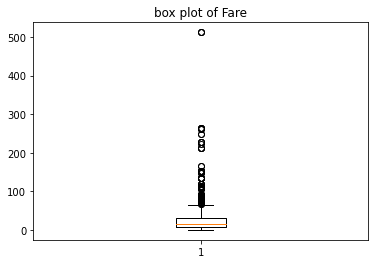

<Figure size 1080x1080 with 0 Axes>

In [38]:
plt.boxplot(titanic_data['Fare'])
plt.title('box plot of Fare')

In [43]:
Q1= np.percentile(titanic_data['Fare'], 25, interpolation='midpoint')
Q2= np.percentile(titanic_data['Fare'], 50, interpolation='midpoint')
Q3= np.percentile(titanic_data['Fare'], 75, interpolation='midpoint')
IQR=Q3-Q1
Low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [45]:
outlier=[]
for x in titanic_data['Fare']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)

In [47]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [50]:
ind1=titanic_data['Fare']>Up_lim
titanic_data.loc[ind1].index
titanic_data.drop(titanic_data.loc[ind1].index,inplace=True)


Text(0.5, 1.0, 'box plot of Fare')

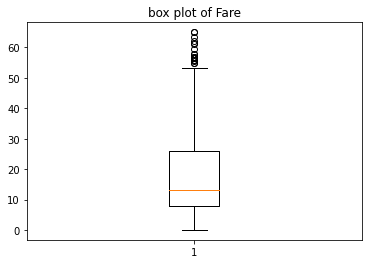

In [51]:
plt.boxplot(titanic_data['Fare'])
plt.title('box plot of Fare')

Text(0.5, 1.0, 'box plot of Age')

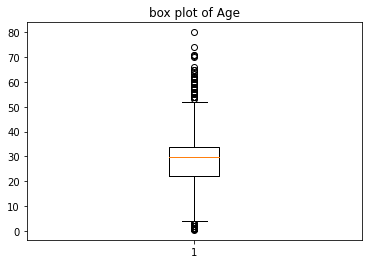

In [52]:
plt.boxplot(titanic_data['Age'])
plt.title('box plot of Age')

In [53]:
Q1= np.percentile(titanic_data['Age'], 25, interpolation='midpoint')
Q2= np.percentile(titanic_data['Age'], 50, interpolation='midpoint')
Q3= np.percentile(titanic_data['Age'], 75, interpolation='midpoint')
IQR=Q3-Q1
Low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [54]:
outlier=[]
for x in titanic_data['Age']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)

In [55]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [56]:
ind1=titanic_data['Age']>Up_lim
titanic_data.loc[ind1].index
titanic_data.drop(titanic_data.loc[ind1].index,inplace=True)

Text(0.5, 1.0, 'box plot of Age')

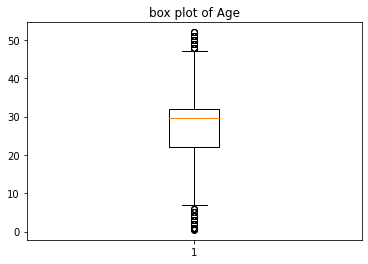

In [57]:
plt.boxplot(titanic_data['Age'])
plt.title('box plot of Age')

Text(0.5, 1.0, 'box plot of Pclass')

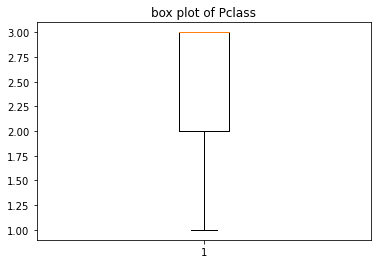

In [58]:
plt.boxplot(titanic_data['Pclass'])
plt.title('box plot of Pclass')

In [59]:
Q1= np.percentile(titanic_data['Pclass'], 25, interpolation='midpoint')
Q2= np.percentile(titanic_data['Pclass'], 50, interpolation='midpoint')
Q3= np.percentile(titanic_data['Pclass'], 75, interpolation='midpoint')
IQR=Q3-Q1
Low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [60]:
outlier=[]
for x in titanic_data['Pclass']:
    if((x>Up_lim) or (x<Low_lim)):
        outlier.append(x)

In [62]:
ind1=titanic_data['Pclass']>Up_lim
titanic_data.loc[ind1].index

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'box plot of Pclass')

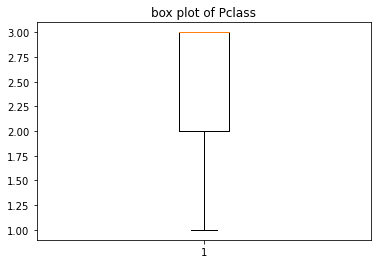

In [63]:
plt.boxplot(titanic_data['Pclass'])
plt.title('box plot of Pclass')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [15]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'passenger')

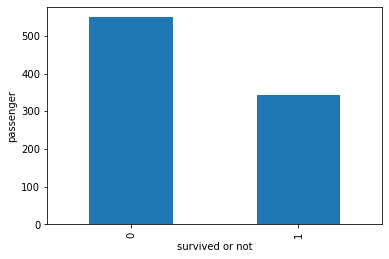

In [51]:
a=titanic_data.Survived.value_counts().plot(kind='bar')
a.set_xlabel('survived or not')
a.set_ylabel('passenger')


In [10]:
b=titanic_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
c=pd.get_dummies(b)


In [11]:
c

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


<AxesSubplot:>

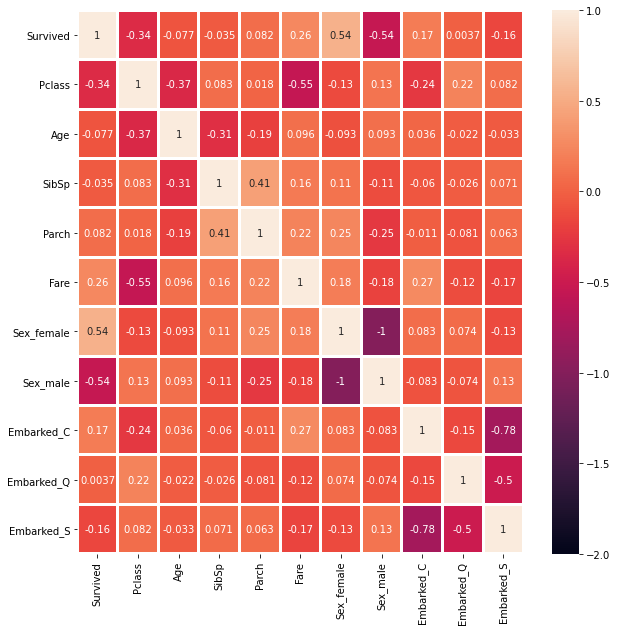

In [21]:
corrmatrix=c.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,linewidth=2,annot=True)

In [23]:
y=c['Survived']
x=c.drop(['Survived'],axis=1)

In [25]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#minmax scaling
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x=minmax.fit_transform(x)
x=pd.DataFrame(x)

In [50]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.418036,0.182540,0.137843,0.134343,0.096995,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.247612,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.472229,0.125000,0.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
